In [1]:
from catboost import CatBoostClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
from sklearn.model_selection import KFold, StratifiedKFold
import utils

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/flypew/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from utils import Imputer, MainFeatureExtractor, SimpleStatisticsExtractor, GeoFeatureExtractor, UserFeatureExtractor
from utils import BagOfWordsExtractor, TargetEncodingExtractor, ALSEmbeddingExtractor

In [3]:
path = "data/"
data_start = pd.read_csv(path + 'train_events.csv')
video_start = pd.read_csv(path + 'video_info_v2.csv')
targets_start = pd.read_csv(path + 'train_targets.csv')
test_events = pd.read_csv(path + 'test_events.csv')
sample_submission = pd.read_csv(path + 'subm.csv')

,viewer_uid,age,sex,age_class
0,10087154,30,male,1
1,10908708,25,female,1
2,10190464,34,male,2
3,10939673,25,male,1
4,10288257,48,male,3
...,...,...,...,...
180007,10237402,43,female,3
180008,10796936,32,male,2
180009,10684284,28,male,1
180010,10031093,50,female,3


,viewer_uid,age,sex,age_class
0,14416,39,female,0
1,5190,12,male,1
2,8887,23,male,0
3,55417,18,female,3
4,8980,48,female,3
...,...,...,...,...
59999,16343,44,female,0
60000,47183,26,female,3
60001,23370,58,male,0
60002,12750,22,male,1


In [4]:
sample_submission[sample_submission.viewer_uid < 5]

,viewer_uid,age,sex,age_class
16323,2,25,female,1
29305,4,36,male,3
43834,1,51,female,3
45885,0,17,male,2
55031,3,23,female,3


In [5]:
import warnings
warnings.filterwarnings('ignore')

events, features = Imputer().fit_transform(data_start, video_start, targets_start)
test_events, test_features = Imputer().fit_transform(test_events, video_start, sample_submission)
print(test_features.shape)

for extractor in [MainFeatureExtractor(), ALSEmbeddingExtractor(), SimpleStatisticsExtractor(), BagOfWordsExtractor(), UserFeatureExtractor(), GeoFeatureExtractor()]:
    events, features = extractor.fit_transform(events, features)
    test_events, test_features = extractor.transform(test_events, test_features)
    print(test_features.shape)

features.shape, test_features.shape

Applying Imputer...
Applying Imputer...


,viewer_uid,age,sex,age_class
0,10087154,30,0,1
1,10908708,25,1,1
2,10190464,34,0,2
3,10939673,25,0,1
4,10288257,48,0,3
...,...,...,...,...
180007,10237402,43,1,3
180008,10796936,32,0,2
180009,10684284,28,0,1
180010,10031093,50,1,3


,viewer_uid,age,sex,age_class
0,14416,39,1,0
1,5190,12,0,1
2,8887,23,0,0
3,55417,18,1,3
4,8980,48,1,3
...,...,...,...,...
59999,16343,44,1,0
60000,47183,26,1,3
60001,23370,58,0,0
60002,12750,22,0,1


(60004, 4)
Applying MainFeatureExtractor...
Applying MainFeatureExtractor...
(60004, 38)


,viewer_uid,favourite_cat,percent_fav_cat,embeds_0,embeds_1,embeds_2,embeds_3,embeds_4,embeds_5,embeds_6,...,embeds_25,embeds_26,embeds_27,embeds_28,embeds_29,embeds_30,embeds_31,age,sex,age_class
0,10000001,Телепередачи,1.000000,-12.513889,7.161385,-1.921415,-2.510002,-2.536459,3.872850,1.688143,...,0.296535,2.228844,-0.781238,0.979583,0.499716,-0.831642,2.697985,40,1,2
1,10000002,Сериалы,0.777778,-8.857679,7.798440,-0.388398,-2.044650,1.806627,-0.580760,-2.159648,...,-0.896826,-2.626723,1.500267,-1.236043,-1.899359,1.300126,0.106583,44,0,3
2,10000004,Наука,0.333333,0.684283,-0.659586,-3.842297,2.629033,0.829981,-2.002862,0.163314,...,-0.343905,-0.277934,-0.358481,-0.651661,-1.051867,-0.105431,-1.498083,36,0,2
3,10000005,Технологии и интернет,1.000000,2.962347,-1.101059,-1.526201,-1.449923,-0.182694,-1.361750,-0.151736,...,-0.393002,0.410601,-0.895560,-1.239015,-0.741628,-0.058947,-1.069365,38,0,2
4,10000006,Аниме,1.000000,-3.673235,0.747184,-0.086243,-0.816762,-0.109268,0.662777,-0.299665,...,-0.001740,0.563425,-1.091279,0.212252,2.557632,0.318442,-0.514779,38,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180007,11140828,Обучение,1.000000,2.133036,-1.096400,-1.582144,-0.262729,-0.075480,1.068188,0.915027,...,0.077170,0.014102,-0.304724,-1.163026,0.094041,0.684404,0.748525,40,0,2
180008,11140869,Обучение,1.000000,2.133036,-1.096400,-1.582144,-0.262729,-0.075480,1.068188,0.915027,...,0.077170,0.014102,-0.304724,-1.163026,0.094041,0.684404,0.748525,21,0,1
180009,11140872,Развлечения,0.500000,-1.413540,-1.892220,0.080328,0.342129,1.601708,-0.704067,0.637352,...,0.129977,0.232283,0.786130,0.620323,-0.236698,0.267419,1.709129,48,0,3
180010,11140875,Обучение,1.000000,2.133036,-1.096400,-1.582144,-0.262729,-0.075480,1.068188,0.915027,...,0.077170,0.014102,-0.304724,-1.163026,0.094041,0.684404,0.748525,27,0,1


,viewer_uid,favourite_cat,percent_fav_cat,embeds_0,embeds_1,embeds_2,embeds_3,embeds_4,embeds_5,embeds_6,...,embeds_25,embeds_26,embeds_27,embeds_28,embeds_29,embeds_30,embeds_31,age,sex,age_class
0,0,Интервью,0.444444,1.077078,-0.390455,-3.495858,3.302691,-0.606018,-0.460489,0.320561,...,0.508605,-0.540765,-0.658836,-0.332207,0.349840,0.618324,-0.545439,17,0,2
1,1,Интервью,1.000000,0.564434,0.316903,-1.494539,1.172559,0.178927,2.117354,0.322702,...,-0.175254,-0.885401,0.267105,-0.667530,0.054972,0.860728,0.188438,51,1,3
2,2,Интервью,1.000000,0.002297,2.449512,0.350874,3.901901,0.288132,-1.570195,-0.081027,...,0.506931,-1.318057,-0.253278,-0.661825,0.918048,-0.203100,0.129561,25,1,1
3,3,Аниме,1.000000,-6.741953,1.274670,-0.091321,-1.941413,-0.915463,0.907755,0.050411,...,0.827477,1.173144,-1.435886,-0.551694,2.015676,-2.504337,-0.068119,23,1,3
4,4,Сериалы,0.961538,-23.463378,11.654719,0.706796,-6.290778,3.466867,-3.221894,-1.947717,...,-4.229809,1.447468,-0.560695,-3.069140,3.489121,5.577279,4.004237,36,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59999,59999,Телепередачи,0.800000,-0.118253,3.974668,-0.326776,-0.131987,-0.833007,-0.400896,-1.096318,...,-0.771268,1.258575,0.925014,0.088848,-0.185177,0.675174,1.179083,24,1,0
60000,60000,Лайфстайл,0.500000,-0.011947,1.730320,-0.660657,1.132224,1.198225,1.667148,0.239377,...,0.313054,2.055012,-0.001205,-0.873332,0.358669,-0.413272,-0.230794,19,1,0
60001,60001,Обучение,1.000000,2.133036,-1.096400,-1.582144,-0.262729,-0.075480,1.068188,0.915027,...,0.077170,0.014102,-0.304724,-1.163026,0.094041,0.684404,0.748525,48,0,3
60002,60002,Телепередачи,1.000000,-3.026376,0.146036,-0.313292,-1.471436,-0.506652,1.663145,1.409331,...,-0.502095,0.985514,-0.531099,0.439493,-0.816236,0.339368,0.440810,39,1,3


Applying ALSEmbeddingExtractor...
Applying ALSEmbeddingExtractor...
(60004, 102)


,viewer_uid,favourite_cat,percent_fav_cat,embeds_0,embeds_1,embeds_2,embeds_3,embeds_4,embeds_5,embeds_6,...,als_emb_54,als_emb_55,als_emb_56,als_emb_57,als_emb_58,als_emb_59,als_emb_60,als_emb_61,als_emb_62,als_emb_63
0,10000001,Телепередачи,1.000000,-12.513889,7.161385,-1.921415,-2.510002,-2.536459,3.872850,1.688143,...,0.019329,0.166153,0.048529,-0.041694,-0.044949,0.102986,0.119806,-0.141019,-0.022672,0.066048
1,10000002,Сериалы,0.777778,-8.857679,7.798440,-0.388398,-2.044650,1.806627,-0.580760,-2.159648,...,0.077708,0.389112,0.210388,0.125140,-0.284851,0.012282,0.270381,0.084130,0.380123,-0.113217
2,10000004,Наука,0.333333,0.684283,-0.659586,-3.842297,2.629033,0.829981,-2.002862,0.163314,...,0.062815,0.020193,-0.159851,0.133913,0.030864,0.057385,0.070150,0.154950,0.030773,0.067107
3,10000005,Технологии и интернет,1.000000,2.962347,-1.101059,-1.526201,-1.449923,-0.182694,-1.361750,-0.151736,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,10000006,Аниме,1.000000,-3.673235,0.747184,-0.086243,-0.816762,-0.109268,0.662777,-0.299665,...,0.217180,-0.031190,0.214269,-0.054854,0.029030,0.080904,-0.112232,-0.040258,-0.062398,-0.141778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180007,11140828,Обучение,1.000000,2.133036,-1.096400,-1.582144,-0.262729,-0.075480,1.068188,0.915027,...,0.019795,0.007085,-0.019769,0.011535,0.004862,-0.010790,0.015740,0.006515,-0.007751,-0.013634
180008,11140869,Обучение,1.000000,2.133036,-1.096400,-1.582144,-0.262729,-0.075480,1.068188,0.915027,...,0.017636,0.006309,-0.017609,0.010274,0.004331,-0.009613,0.014020,0.005805,-0.006909,-0.012150
180009,11140872,Развлечения,0.500000,-1.413540,-1.892220,0.080328,0.342129,1.601708,-0.704067,0.637352,...,-0.014298,0.004855,0.041765,-0.009444,-0.005689,-0.011500,-0.006822,0.007330,0.010239,0.017792
180010,11140875,Обучение,1.000000,2.133036,-1.096400,-1.582144,-0.262729,-0.075480,1.068188,0.915027,...,0.015203,0.005437,-0.015178,0.008854,0.003733,-0.008286,0.012084,0.005006,-0.005958,-0.010476


,viewer_uid,favourite_cat,percent_fav_cat,embeds_0,embeds_1,embeds_2,embeds_3,embeds_4,embeds_5,embeds_6,...,als_emb_54,als_emb_55,als_emb_56,als_emb_57,als_emb_58,als_emb_59,als_emb_60,als_emb_61,als_emb_62,als_emb_63
0,0,Интервью,0.444444,1.077078,-0.390455,-3.495858,3.302691,-0.606018,-0.460489,0.320561,...,0.122281,-0.017095,-0.122064,0.106463,0.109368,0.050233,0.108335,0.093794,0.015066,0.199553
1,1,Интервью,1.000000,0.564434,0.316903,-1.494539,1.172559,0.178927,2.117354,0.322702,...,-0.012830,-0.009053,0.023396,-0.015266,0.010809,0.013824,-0.012560,-0.010733,-0.000230,-0.018493
2,2,Интервью,1.000000,0.002297,2.449512,0.350874,3.901901,0.288132,-1.570195,-0.081027,...,0.003554,-0.000151,0.004831,0.001505,0.003481,-0.001218,-0.002384,-0.001499,-0.001660,0.000770
3,3,Аниме,1.000000,-6.741953,1.274670,-0.091321,-1.941413,-0.915463,0.907755,0.050411,...,0.275584,-0.039602,0.271907,-0.069543,0.036861,0.102654,-0.142323,-0.051167,-0.078985,-0.179777
4,4,Сериалы,0.961538,-23.463378,11.654719,0.706796,-6.290778,3.466867,-3.221894,-1.947717,...,0.395859,0.054853,-0.330374,-0.104960,-0.264898,-0.206929,0.069543,0.052543,0.090549,-0.048178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59999,59999,Телепередачи,0.800000,-0.118253,3.974668,-0.326776,-0.131987,-0.833007,-0.400896,-1.096318,...,-0.037364,-0.040955,0.193826,-0.117188,-0.198486,-0.143245,0.199939,0.042353,-0.155363,0.030236
60000,60000,Лайфстайл,0.500000,-0.011947,1.730320,-0.660657,1.132224,1.198225,1.667148,0.239377,...,0.025809,0.065482,0.061389,0.004534,-0.011800,0.067874,0.061441,-0.128674,-0.006254,0.071121
60001,60001,Обучение,1.000000,2.133036,-1.096400,-1.582144,-0.262729,-0.075480,1.068188,0.915027,...,0.023636,0.008455,-0.023600,0.013766,0.005803,-0.012883,0.018789,0.007782,-0.009261,-0.016287
60002,60002,Телепередачи,1.000000,-3.026376,0.146036,-0.313292,-1.471436,-0.506652,1.663145,1.409331,...,0.018253,0.158227,0.046253,-0.039631,-0.042864,0.098031,0.114094,-0.134573,-0.021523,0.062727


Applying SimpleStatisticsExtractor...
Applying SimpleStatisticsExtractor...
(60004, 230)


,viewer_uid,favourite_cat,percent_fav_cat,embeds_0,embeds_1,embeds_2,embeds_3,embeds_4,embeds_5,embeds_6,...,category_Лайфхаки_viewtime,category_Лайфхаки_views,category_Психология_viewtime,category_Психология_views,category_Люди и блоги_viewtime,category_Люди и блоги_views,category_Охота и рыбалка_viewtime,category_Охота и рыбалка_views,category_Недвижимость_viewtime,category_Недвижимость_views
0,10000001,Телепередачи,1.000000,-12.513889,7.161385,-1.921415,-2.510002,-2.536459,3.872850,1.688143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10000002,Сериалы,0.777778,-8.857679,7.798440,-0.388398,-2.044650,1.806627,-0.580760,-2.159648,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10000004,Наука,0.333333,0.684283,-0.659586,-3.842297,2.629033,0.829981,-2.002862,0.163314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10000005,Технологии и интернет,1.000000,2.962347,-1.101059,-1.526201,-1.449923,-0.182694,-1.361750,-0.151736,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10000006,Аниме,1.000000,-3.673235,0.747184,-0.086243,-0.816762,-0.109268,0.662777,-0.299665,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180007,11140828,Обучение,1.000000,2.133036,-1.096400,-1.582144,-0.262729,-0.075480,1.068188,0.915027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180008,11140869,Обучение,1.000000,2.133036,-1.096400,-1.582144,-0.262729,-0.075480,1.068188,0.915027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180009,11140872,Развлечения,0.500000,-1.413540,-1.892220,0.080328,0.342129,1.601708,-0.704067,0.637352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180010,11140875,Обучение,1.000000,2.133036,-1.096400,-1.582144,-0.262729,-0.075480,1.068188,0.915027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,viewer_uid,favourite_cat,percent_fav_cat,embeds_0,embeds_1,embeds_2,embeds_3,embeds_4,embeds_5,embeds_6,...,category_Здоровье_viewtime,category_Здоровье_views,category_Строительство и ремонт_viewtime,category_Строительство и ремонт_views,category_Охота и рыбалка_viewtime,category_Охота и рыбалка_views,category_Дизайн_viewtime,category_Дизайн_views,category_Недвижимость_viewtime,category_Недвижимость_views
0,0,Интервью,0.444444,1.077078,-0.390455,-3.495858,3.302691,-0.606018,-0.460489,0.320561,...,0.050628,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Интервью,1.000000,0.564434,0.316903,-1.494539,1.172559,0.178927,2.117354,0.322702,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Интервью,1.000000,0.002297,2.449512,0.350874,3.901901,0.288132,-1.570195,-0.081027,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Аниме,1.000000,-6.741953,1.274670,-0.091321,-1.941413,-0.915463,0.907755,0.050411,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Сериалы,0.961538,-23.463378,11.654719,0.706796,-6.290778,3.466867,-3.221894,-1.947717,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59999,59999,Телепередачи,0.800000,-0.118253,3.974668,-0.326776,-0.131987,-0.833007,-0.400896,-1.096318,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60000,60000,Лайфстайл,0.500000,-0.011947,1.730320,-0.660657,1.132224,1.198225,1.667148,0.239377,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60001,60001,Обучение,1.000000,2.133036,-1.096400,-1.582144,-0.262729,-0.075480,1.068188,0.915027,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60002,60002,Телепередачи,1.000000,-3.026376,0.146036,-0.313292,-1.471436,-0.506652,1.663145,1.409331,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Applying BagOfWords extractor...
Applying BagOfWords extractor...
(60004, 358)


,viewer_uid,favourite_cat,percent_fav_cat,embeds_0,embeds_1,embeds_2,embeds_3,embeds_4,embeds_5,embeds_6,...,поделка_count,час_count,война_count,дело_count,играть_count,эфир_count,челлендж_count,сверхъестественный_count,глаз_count,стиль_count
0,10000001,Телепередачи,1.000000,-12.513889,7.161385,-1.921415,-2.510002,-2.536459,3.872850,1.688143,...,0,0,0,0,0,0,0,0,0,0
1,10000002,Сериалы,0.777778,-8.857679,7.798440,-0.388398,-2.044650,1.806627,-0.580760,-2.159648,...,0,0,0,0,0,0,0,0,0,0
2,10000004,Наука,0.333333,0.684283,-0.659586,-3.842297,2.629033,0.829981,-2.002862,0.163314,...,0,0,0,0,0,0,0,0,0,0
3,10000005,Технологии и интернет,1.000000,2.962347,-1.101059,-1.526201,-1.449923,-0.182694,-1.361750,-0.151736,...,0,0,0,0,0,0,0,0,0,0
4,10000006,Аниме,1.000000,-3.673235,0.747184,-0.086243,-0.816762,-0.109268,0.662777,-0.299665,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180007,11140828,Обучение,1.000000,2.133036,-1.096400,-1.582144,-0.262729,-0.075480,1.068188,0.915027,...,0,0,0,0,0,0,0,0,0,0
180008,11140869,Обучение,1.000000,2.133036,-1.096400,-1.582144,-0.262729,-0.075480,1.068188,0.915027,...,0,0,0,0,0,0,0,0,0,0
180009,11140872,Развлечения,0.500000,-1.413540,-1.892220,0.080328,0.342129,1.601708,-0.704067,0.637352,...,0,0,0,0,0,0,0,0,0,0
180010,11140875,Обучение,1.000000,2.133036,-1.096400,-1.582144,-0.262729,-0.075480,1.068188,0.915027,...,0,0,0,0,0,0,0,0,0,0


,viewer_uid,favourite_cat,percent_fav_cat,embeds_0,embeds_1,embeds_2,embeds_3,embeds_4,embeds_5,embeds_6,...,поделка_count,час_count,война_count,дело_count,играть_count,эфир_count,челлендж_count,сверхъестественный_count,глаз_count,стиль_count
0,0,Интервью,0.444444,1.077078,-0.390455,-3.495858,3.302691,-0.606018,-0.460489,0.320561,...,0,0,0,0,0,0,0,0,0,0
1,1,Интервью,1.000000,0.564434,0.316903,-1.494539,1.172559,0.178927,2.117354,0.322702,...,0,0,0,0,0,0,0,0,0,0
2,2,Интервью,1.000000,0.002297,2.449512,0.350874,3.901901,0.288132,-1.570195,-0.081027,...,0,0,0,0,0,0,0,0,0,0
3,3,Аниме,1.000000,-6.741953,1.274670,-0.091321,-1.941413,-0.915463,0.907755,0.050411,...,0,0,0,0,0,0,0,0,0,0
4,4,Сериалы,0.961538,-23.463378,11.654719,0.706796,-6.290778,3.466867,-3.221894,-1.947717,...,0,0,0,0,0,0,0,49,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59999,59999,Телепередачи,0.800000,-0.118253,3.974668,-0.326776,-0.131987,-0.833007,-0.400896,-1.096318,...,0,0,0,0,0,0,0,0,0,0
60000,60000,Лайфстайл,0.500000,-0.011947,1.730320,-0.660657,1.132224,1.198225,1.667148,0.239377,...,0,0,0,0,0,0,0,0,0,0
60001,60001,Обучение,1.000000,2.133036,-1.096400,-1.582144,-0.262729,-0.075480,1.068188,0.915027,...,0,0,0,0,0,0,0,0,0,0
60002,60002,Телепередачи,1.000000,-3.026376,0.146036,-0.313292,-1.471436,-0.506652,1.663145,1.409331,...,0,0,0,0,0,0,0,0,0,0


Applying UserFeatureExtractor...
Applying UserFeatureExtractor...
(60004, 374)


,viewer_uid,travel_count,has_app_installed,has_other,has_android,has_windows,has_mac,has_ios,has_ipados,uses_atom,...,поделка_count,час_count,война_count,дело_count,играть_count,эфир_count,челлендж_count,сверхъестественный_count,глаз_count,стиль_count
0,10000001,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10000002,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10000004,3,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10000005,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10000006,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180007,11140828,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180008,11140869,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180009,11140872,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180010,11140875,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,viewer_uid,travel_count,has_app_installed,has_other,has_android,has_windows,has_mac,has_ios,has_ipados,uses_atom,...,поделка_count,час_count,война_count,дело_count,играть_count,эфир_count,челлендж_count,сверхъестественный_count,глаз_count,стиль_count
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,49,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59999,59999,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60000,60000,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60001,60001,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60002,60002,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Applying GeoFeatureExtractor...
Applying GeoFeatureExtractor...
(60004, 377)


,viewer_uid,region,region_user_count_log,utc_delta,travel_count,has_app_installed,has_other,has_android,has_windows,has_mac,...,поделка_count,час_count,война_count,дело_count,играть_count,эфир_count,челлендж_count,сверхъестественный_count,глаз_count,стиль_count
0,10000001,Moscow,12.857973,3,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,10000002,Moscow,12.857973,3,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10000004,Moscow,12.857973,3,3,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10000005,Tatarstan Republic,10.548547,3,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,10000006,Sverdlovsk Oblast,11.173262,5,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180007,11140828,St.-Petersburg,11.671603,3,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
180008,11140869,St.-Petersburg,11.671603,3,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
180009,11140872,other,9.170664,2,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
180010,11140875,Moscow,12.857973,3,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


,viewer_uid,region,region_user_count_log,utc_delta,travel_count,has_app_installed,has_other,has_android,has_windows,has_mac,...,поделка_count,час_count,война_count,дело_count,играть_count,эфир_count,челлендж_count,сверхъестественный_count,глаз_count,стиль_count
0,0,other,7.021976,3,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,other,6.962243,3,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,other,8.375860,7,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,Krasnodar Krai,10.038455,3,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,other,8.375860,7,1,0,0,0,1,0,...,0,0,0,0,0,0,0,49,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59999,59999,Moscow,11.752792,3,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
60000,60000,other,7.485492,3,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
60001,60001,St.-Petersburg,10.583245,3,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
60002,60002,Nizhny Novgorod Oblast,9.628261,3,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


((180012, 377), (60004, 377))

In [9]:
class CatboostEstimator:
    """
    Класс для обучения Catboost
    """

    def fit(self, X, y, ids, n_splits, cat_features, score):
        """
        Разбивает данные на k фолдов со стратификацией и обучает n_splits катбустов
        """
        self.one_model = False
        self.models = []
        scores = []
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        for ind, (train_index, val_index) in enumerate(skf.split(X, y)):
            X_train = X.loc[train_index]
            y_train = y.loc[train_index]
            X_val = X.loc[val_index]
            y_val = y.loc[val_index]

            # train_idx = ids.loc[train_index]
            # train_idx.name = 'viewer_uid'

            # y_train_idx = y_train.copy()
            # y_train_idx.index = train_idx
            # X_train['viewer_uid'] = train_idx
            # val_idx = ids.loc[val_index]
            # val_idx.name = 'viewer_uid'
            # X_val['viewer_uid'] = val_idx
            # if y.name == 'age_class':
            #     target_enc_ext = utils.TargetEncodingExtractor()
            # else:
            #     target_enc_ext = utils.TargetEncodingExtractorSex()                
            # events_filtered_train = pd.merge(events, train_idx, on='viewer_uid', how='inner')
            # target_enc_ext.fit(events_filtered_train, pd.merge(X_train, y_train_idx, on='viewer_uid', how='inner'))
            # events_filtered_test = pd.merge(events, val_idx, on='viewer_uid', how='inner')

            # X_train = target_enc_ext.transform(events_filtered_train, X_train).drop(columns=['viewer_uid'])
            # X_val = target_enc_ext.transform(events_filtered_test, X_val).drop(columns=['viewer_uid'])

            model = CatBoostClassifier(cat_features=cat_features, verbose=500, iterations=1000)
            model.fit(X_train, y_train, verbose=500, eval_set=(X_val, y_val))
            
            self.models.append(model)
            y_pred = model.predict(X_val)
            scores.append(score(y_val, y_pred))
            print(f'model {ind}: score = {round(scores[-1], 4)}')
        
        scores = np.array(scores)
        print(f'mean score = {scores.mean().round(4)}, std = {scores.std().round(4)}')
        print(f'overall score = {(scores.mean() - scores.std()).round(4)}')
            
    
    def fit_select_features(self, X, y, cat_features, to_drop):
        """
        Обучает один катбуст и выполняет elect features
        """
        self.one_model = True
        
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
        
        self.model = CatBoostClassifier(cat_features=cat_features, verbose=150, iterations=2000)
        
        self.model.select_features(X_train, y_train, verbose=500, eval_set=(X_val, y_val), steps=10,
                                  num_features_to_select=30, features_for_select=X.columns,
                                  algorithm='RecursiveByLossFunctionChange', train_final_model=True)

    def predict(self, X, cnt_classes):
        if self.one_model:
            return self.model.predict_proba(X)
        
        y_pred = np.zeros((X.shape[0], cnt_classes))

        for model in self.models:
            y_pred += model.predict_proba(X)
        y_pred /= cnt_classes
        y_pred = np.argmax(y_pred, axis=1)
        
        return y_pred

In [10]:
from sklearn.metrics import f1_score, accuracy_score

def score_sex(y_true, y_pred):
    return accuracy_score(y_true, y_pred)


def score_age(y_true, y_pred):
    return f1_score(y_true, y_pred, average='weighted')

In [11]:
cat_features = []
for i, col in enumerate(features.columns):
    if features[col].dtype in ['object', 'category']:
        cat_features.append(col)
        
cat_features

['region', 'favourite_cat']

In [12]:
catboost_sex = CatboostEstimator()
catboost_age = CatboostEstimator()

features_to_drop = [
    'viewer_uid',
    'age'
]

target_sex = 'sex'
target_age = 'age_class'

print('Sex model\n')

ids = features.reset_index()['viewer_uid']
ids.name = 'viewer_uid'
y_sex = features[target_sex]
y_sex.name = target_sex

y_age = features[target_age]
y_age.name = target_age

catboost_sex.fit(features.drop(columns=features_to_drop + [target_sex] + [target_age]),
                 y_sex,
                 ids,
                 n_splits=2,
                 cat_features=cat_features,
                 score=score_sex)

print('\n\n\nAge model\n')

catboost_age.fit(features.drop(columns=features_to_drop + [target_sex] + [target_age]),
                 y_age,
                 ids,
                 n_splits=2,
                 cat_features=cat_features,
                 score=score_age)

Sex model

Learning rate set to 0.096297
0:	learn: 0.6683610	test: 0.6681470	best: 0.6681470 (0)	total: 112ms	remaining: 1m 52s
500:	learn: 0.4439777	test: 0.4889950	best: 0.4889950 (500)	total: 18.9s	remaining: 18.9s
999:	learn: 0.4024766	test: 0.4888346	best: 0.4884393 (758)	total: 37.8s	remaining: 0us

bestTest = 0.4884393027
bestIteration = 758

Shrink model to first 759 iterations.
model 0: score = 0.759
Learning rate set to 0.096297
0:	learn: 0.6661295	test: 0.6665871	best: 0.6665871 (0)	total: 51.7ms	remaining: 51.6s
500:	learn: 0.4409337	test: 0.4932824	best: 0.4932662 (493)	total: 18.9s	remaining: 18.8s
999:	learn: 0.4005029	test: 0.4934946	best: 0.4928786 (757)	total: 37.2s	remaining: 0us

bestTest = 0.4928785969
bestIteration = 757

Shrink model to first 758 iterations.
model 1: score = 0.7548
mean score = 0.7569, std = 0.0021
overall score = 0.7548



Age model

Learning rate set to 0.118144
0:	learn: 1.3446902	test: 1.3447794	best: 1.3447794 (0)	total: 161ms	remaining: 2m 

In [13]:
test_features

,viewer_uid,region,region_user_count_log,utc_delta,travel_count,has_app_installed,has_other,has_android,has_windows,has_mac,has_ios,has_ipados,uses_atom,uses_samsung,uses_edge,uses_opera,uses_firefox,uses_yandex,uses_safari,uses_chrome,favourite_cat,percent_fav_cat,embeds_0,embeds_1,embeds_2,embeds_3,embeds_4,embeds_5,embeds_6,embeds_7,embeds_8,embeds_9,embeds_10,embeds_11,embeds_12,embeds_13,embeds_14,embeds_15,embeds_16,embeds_17,embeds_18,embeds_19,embeds_20,embeds_21,embeds_22,embeds_23,embeds_24,embeds_25,embeds_26,embeds_27,embeds_28,embeds_29,embeds_30,embeds_31,age,sex,age_class,als_emb_0,als_emb_1,als_emb_2,als_emb_3,als_emb_4,als_emb_5,als_emb_6,als_emb_7,als_emb_8,als_emb_9,als_emb_10,als_emb_11,als_emb_12,als_emb_13,als_emb_14,als_emb_15,als_emb_16,als_emb_17,als_emb_18,als_emb_19,als_emb_20,als_emb_21,als_emb_22,als_emb_23,als_emb_24,als_emb_25,als_emb_26,als_emb_27,als_emb_28,als_emb_29,als_emb_30,als_emb_31,als_emb_32,als_emb_33,als_emb_34,als_emb_35,als_emb_36,als_emb_37,als_emb_38,als_emb_39,als_emb_40,als_emb_41,als_emb_42,als_emb_43,als_emb_44,als_emb_45,als_emb_46,als_emb_47,als_emb_48,als_emb_49,als_emb_50,als_emb_51,als_emb_52,als_emb_53,als_emb_54,als_emb_55,als_emb_56,als_emb_57,als_emb_58,als_emb_59,als_emb_60,als_emb_61,als_emb_62,als_emb_63,total_views,total_watchtime_mean,total_watchtime_max,total_watchtime_min,total_watchtime_std,total_watchtime_sum,percent_watched_mean,percent_watched_max,percent_watched_min,percent_watched_std,percent_skipped,percent_completed,percent_rewatched,duration_mean,duration_max,duration_min,duration_std,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,day_0,day_1,day_2,day_3,day_4,day_5,day_6,category_Сериалы_viewtime,category_Сериалы_views,category_Разное_viewtime,category_Разное_views,category_Фильмы_viewtime,category_Фильмы_views,category_Хобби_viewtime,category_Хобби_views,category_Телепередачи_viewtime,category_Телепередачи_views,category_Путешествия_viewtime,category_Путешествия_views,category_Обучение_viewtime,category_Обучение_views,category_Юмор_viewtime,category_Юмор_views,category_Аниме_viewtime,category_Аниме_views,category_Интервью_viewtime,category_Интервью_views,category_Развлечения_viewtime,category_Развлечения_views,category_Лайфстайл_viewtime,category_Лайфстайл_views,category_Музыка_viewtime,category_Музыка_views,category_Психология_viewtime,category_Психология_views,category_Спорт_viewtime,category_Спорт_views,category_Еда_viewtime,category_Еда_views,category_Видеоигры_viewtime,category_Видеоигры_views,category_Техника и оборудование_viewtime,category_Техника и оборудование_views,category_Авто-мото_viewtime,category_Авто-мото_views,category_Природа_viewtime,category_Природа_views,category_Технологии и интернет_viewtime,category_Технологии и интернет_views,category_Наука_viewtime,category_Наука_views,category_Детям_viewtime,category_Детям_views,category_Люди и блоги_viewtime,category_Люди и блоги_views,category_Лайфхаки_viewtime,category_Лайфхаки_views,category_Мультфильмы_viewtime,category_Мультфильмы_views,category_Бизнес и предпринимательство_viewtime,category_Бизнес и предпринимательство_views,category_Эзотерика_viewtime,category_Эзотерика_views,category_Животные_viewtime,category_Животные_views,category_Культура_viewtime,category_Культура_views,category_Аудиокниги_viewtime,category_Аудиокниги_views,category_Красота_viewtime,category_Красота_views,category_Аудио_viewtime,category_Аудио_views,category_Обзоры и распаковки товаров_viewtime,category_Обзоры и распаковки товаров_views,category_Сад и огород_viewtime,category_Сад и огород_views,category_Здоровье_viewtime,category_Здоровье_views,category_Строительство и ремонт_viewtime,category_Строительство и ремонт_views,category_Охота и рыбалка_viewtime,category_Охота и рыбалка_views,category_Дизайн_viewtime,category_Дизайн_views,category_Недвижимость_viewtime,category_Недв

In [14]:
train_pred = catboost_sex.predict(features.drop(columns=features_to_drop + [target_sex] + [target_age] + ['age']), cnt_classes=2)
score_sex(features['sex'], train_pred)

0.7921694109281604

In [15]:
age_prediction = catboost_age.predict(test_features.drop(columns=features_to_drop + [target_sex] + [target_age] + ['age']), cnt_classes=4)
sex_prediction = catboost_sex.predict(test_features.drop(columns=features_to_drop + [target_sex] + [target_age] + ['age']), cnt_classes=2)

print(sex_prediction.tolist())

sample_submission = sample_submission.set_index('viewer_uid')
sample_submission.loc[test_features.viewer_uid, 'age_class'] = age_prediction
sample_submission.loc[test_features.viewer_uid, 'sex'] = sex_prediction
sample_submission.loc[test_features.viewer_uid, 'age'] = 0
sample_submission['sex'] = sample_submission['sex'].map({0: 'male', 1: 'female'})
sample_submission

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 

,age,sex,age_class
viewer_uid,,,
14416,0,female,1
5190,0,male,2
8887,0,female,2
55417,0,male,2
8980,0,female,1
...,...,...,...
16343,0,female,1
47183,0,female,3
23370,0,female,1


In [16]:
sample_submission.sex.value_counts()

sex
male      31013
female    28991
Name: count, dtype: int64

In [17]:
sample_submission.sex.value_counts()

sex
male      31013
female    28991
Name: count, dtype: int64

In [18]:
sample_submission.to_csv('submission.csv', index=True)

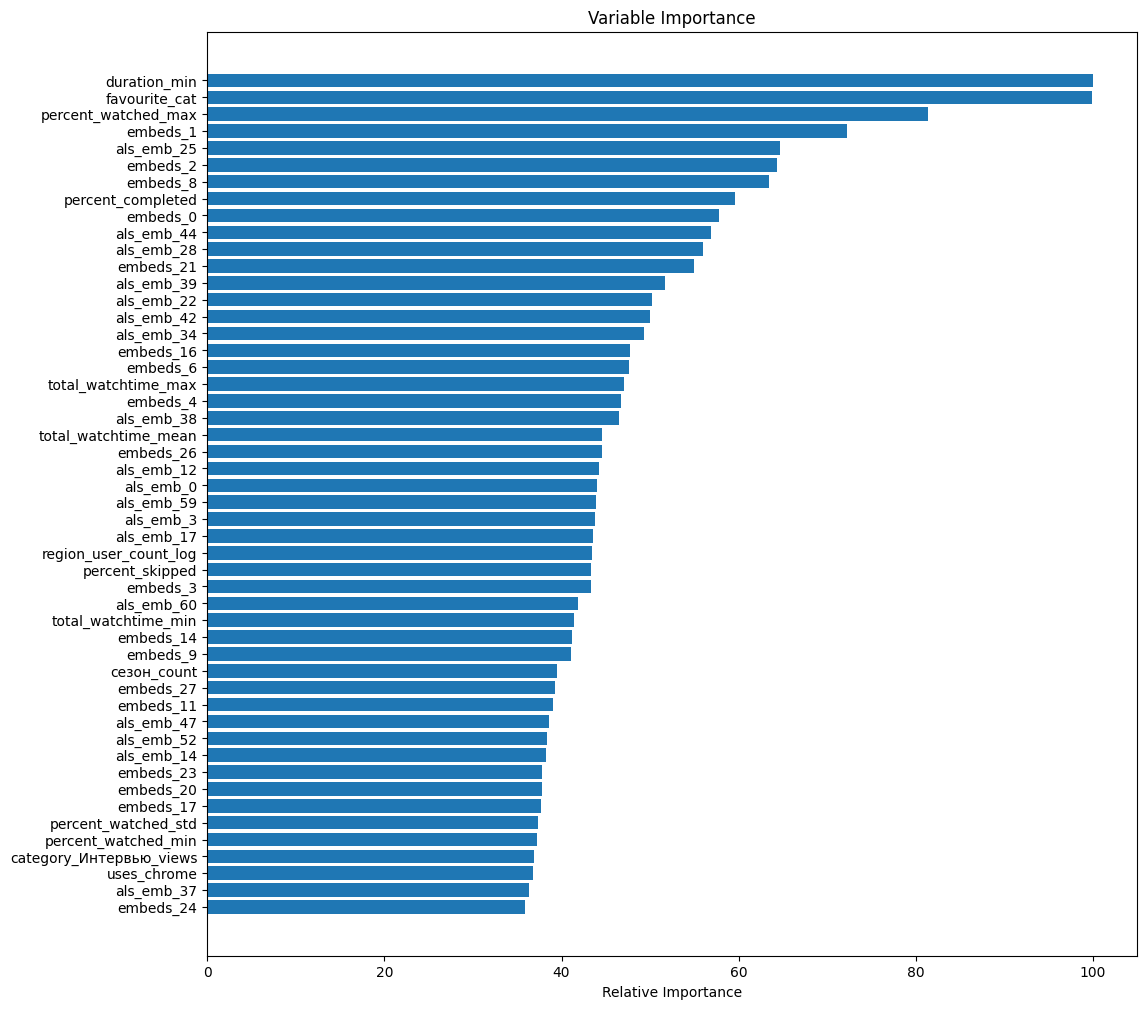

In [19]:
def plot_importance(model, features, top=50):
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    
    cols = features.columns.to_list()
    cols = [f"target_enc_{i}" for i in range(len(sorted_idx) - len(cols))] + cols
    cols = np.array(cols)

    plt.figure(figsize=(12, 12))
    plt.barh(pos[-top:], feature_importance[sorted_idx][-top:], align='center')
    plt.yticks(pos[-top:], cols[sorted_idx][-top:])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
    
plot_importance(catboost_age.models[0], features.drop(columns=features_to_drop + [target_sex] + [target_age]))

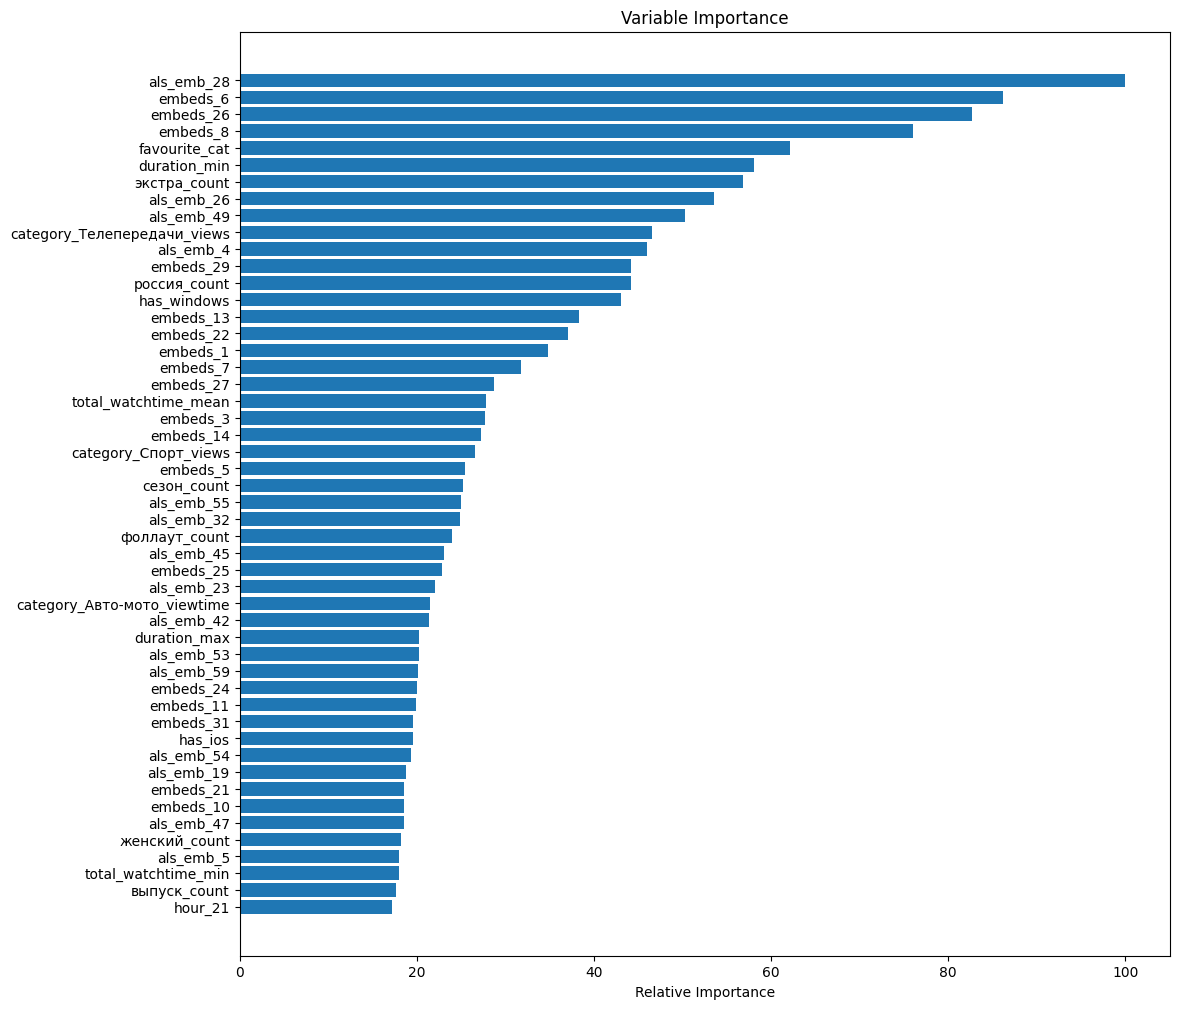

In [20]:
plot_importance(catboost_sex.models[0], features.drop(columns=features_to_drop + [target_sex] + [target_age]))